# K-means Clustering

It is an unsupervised learning algorithm which only requires features in the dataset and not the targets. It clusters the data of n-datapoints into k-clusters. This is done based on the distance of each datapoint from a known centroids. 

There will be k centroids and the datapoint closest to a particular centroid will be clustered into the class belonging to that centroid. Euclidean distance is used to measure how close a datapoint is to a centroid.

We will start off by importing the libraries. Note that we are using scikit-learn only to generate toy data for us to experiment with. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## K-means algorithm 
* We first randomly assign k-centroids. Usually we select k-datapoints radomly from our dataset to be the centroids.
* Repeat: 
    1. Cluster assignment: Assign each data point to the nearest cluster centroid.
    2. Cluster updating: For each cluster centroid, average the locations of it's corresponding points and re-assign the centroid to that location.
    
Cluster assignment can be shown as below,

$$c^{(i)} = argmin_{k} \left\lVert x^{(i)} - \mu_k\right\rVert^2$$ 

where  $c^{(i)}$  is the centroid closest to sample  $x^{(i)} $ and  $\mu_k$  represents the  k-th centroid.

Cluster updating can be shown as below,

$$\mu_k = \frac{1}{n}[x^{(k_1)}+x^{(k_2)}+...+x^{(k_n)}]$$

where $x^{(k)}$ are the datapoints beloning to the k-th cluster.

## Objective Function

For many machine leanring algo we define a cost function that we either minimize or maximize, even for k-means we can define a cost/objective function. The function is as follows,

$$ J(c^{(1)},...,c^{(n)}, \mu_1,...,\mu_k) = \frac{1}{n}\sum_{i=1}^n\left\lVert x^{(i)} - \mu_k\right\rVert^2 $$

Above function we minimize with respect to the classes assigned to the datapoints and the centroids. So we get the optimized value for the function. The above mentioned k-means algorithm finds the minima of this cost function.

We write a function for the algorithm and to calculate the cost.

In [2]:
def perform_kmeans(x, k, seed=None):
    np.random.seed(seed)
    maxiter = 20
    
    # Initializing centroid matrix with random datapoint from x matrix
    centroids = x[np.random.randint(x.shape[0], size=k)]

    # Initialize the vectors in which we will store the
    # assigned classes of each data point and the
    # calculated distances from each centroid
    classes = np.zeros((x.shape[0], 1), dtype=np.float64)
    distances = np.zeros([x.shape[0], k], dtype=np.float64)

    # Loop for the maximum number of iterations
    for i in range(maxiter):
        
        # Assign all points to the nearest centroid
        for i, c in enumerate(centroids):
            distances[:, i] = np.linalg.norm(x - c, axis=1)
        
        # Determine class membership of each point
        # by picking the closest centroid
        classes = np.argmin(distances, axis=1)
        
        # Update centroid location using the newly
        # assigned data point classes
        for c in range(k):
            if x[classes == c].size:
                centroids[c] = np.mean(x[classes == c], axis=0)
            
    # Calculating the cost
    cost = 0
    for c in range(k):
        cost += np.sum((x[classes == c] - centroids[c]) ** 2)
    cost = cost/(x.shape[0])
        
    return cost, centroids, classes
    

We will now generate our toy dataset to see if everything works. For now we are generating few datapoints, why are we doing this is because we will see how the random initialization gives different results. This can be better seen if we have less data.

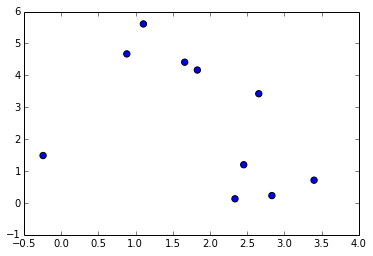

In [3]:
X, y_true = make_blobs(n_samples=10, centers=2, cluster_std=0.9, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40);

## Random Initialization

So does random initialization actually affect how the clusters will be formed. The answer is yes, and to demonstrate this we will run k-means for many times with different random initializations. We will see how it gives different results. We will only take the unique cases where cost function has converged to a different value that we have never seen before.

Here in this case we run the k-means algo for 200 times by taking the random seed as the iteration number(to reproduce the same result everytime we run the same code). We see that the algorithm gives 3 different ways of clustering as of now. This happens because of the cost function got stuck to a local minima rather than reaching a global minima.

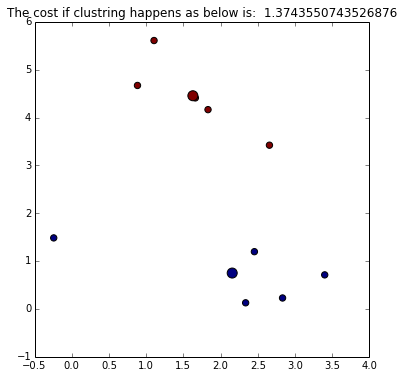

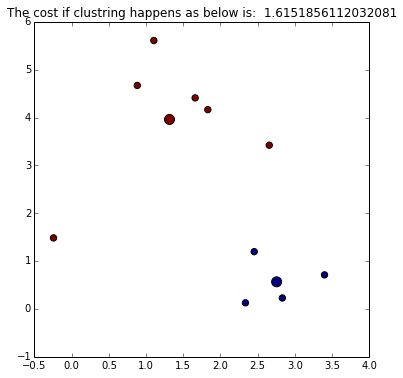

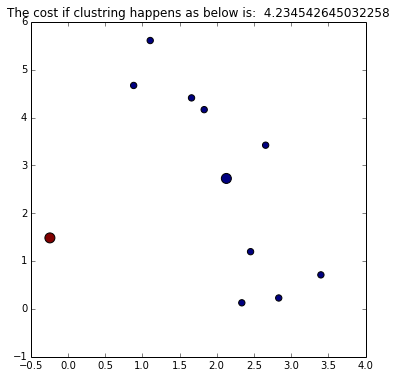

In [4]:
k = 2
costs = []

for i in range(200):
    cost, centroids, classes = perform_kmeans(X, k, i)
    
    # Checking if the same cost value appeared before, if not we found another way to cluster our dataset
    if cost not in costs:
        costs.append(cost)
        fig, ax = plt.subplots(figsize=(6,6))
        ax.scatter(X[:,0], X[:,1], c=classes, s = 40)
        ax.scatter(centroids[:,0], centroids[:,1], c = np.arange(k),s = 100)
        ax.set_title('The cost if clustring happens as below is:  ' + str(cost))
        


As seen above the worst case cost is around 4.23 and the clusters that it has formed is with only one data point in one cluster and remaining all in other cluster. This might have happened because the centroids were badly initialized in the begining.

To solve the Random Initialization problem, one way is to run the algorithm several times and take the case where we get minimum value of the cost function from all those iterations, as we did above.

## Choosing K value

Most of the times we will know the value of k because of the application and how we want the data to be clustered. But there might be cases where we might be confused between certain values of k. The best way is to find the cost associated with those values of k and make the decision.

To demonstarte this, lets define a new dataset with more datapoints because with less data we will not be able to give a larger range of values of k. 

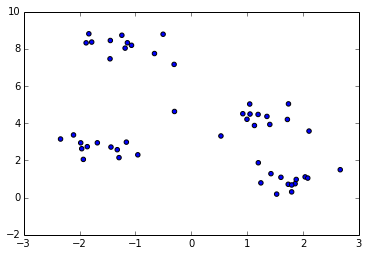

In [5]:
X, y_true = make_blobs(n_samples=50, centers=4, cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=20);

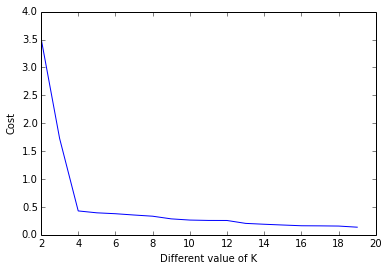

In [6]:
costs = []

# Running k-means for a range of k values
for k in range(2,20):
    cost, centroids, classes = perform_kmeans(X, k, seed = 1)
    costs.append(cost)

plt.plot(np.arange(2,20), costs)
plt.xlabel('Different value of K')
plt.ylabel('Cost')
plt.show()

### Elbow Method

The cost goes down till k value of 4 and after that it decreses but not much, so 4 can be good value of k that we can select. This is called the elbow method. Here it was too obvious and the perfect elbow was visible, lets make a more vague data and see the results.

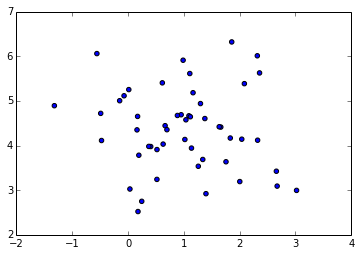

In [7]:
X, y_true = make_blobs(n_samples=50, centers=1, cluster_std=0.9, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=20);

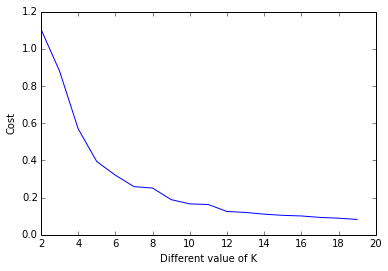

In [8]:
costs = []

# Running k-means for a range of k values
for k in range(2,20):
    cost, centroids, classes = perform_kmeans(X, k, seed = 1)
    costs.append(cost)

plt.plot(np.arange(2,20), costs)
plt.xlabel('Different value of K')
plt.ylabel('Cost')
plt.show()

Here there is no perfect elbow visible, but it is like a curve. So maybe in this case 6 to 8 would be a good value for k that we can go for. However its highly recommended that we select the k value based the application of where we are going to use it and how many clusters we need afterall.

## Conclusion

K-means algorithm is a very popular unsupervised learning algorithm and can be used in a lot of places where we have to cluster tha data based on some structure.

Usually if we have a big dataset and we want to cluster it into many clusters, i.e. large value of k, then the random initialization problem wont affect much and its quite possible that we get a good optimum value of cost fuction in the first trial itself.

## Reference

* http://jonchar.net/notebooks/k-means/

* https://flothesof.github.io/k-means-numpy.html